In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Inflation normalizer

# Loading dataset

In [2]:
df = pd.read_csv("../data/transfer_history_combined.csv")

In [3]:
df.drop("Unnamed: 0", axis=1 , inplace=True)

# Exploring dataset

In [4]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,FC Girondins Bordeaux,Zinédine Zidane,20.0,Attacking Midfield,Cannes,£6.30m,in,Summer,6.3,Ligue 1,1992,1992/1993
1,FC Girondins Bordeaux,Laurent Croci,27.0,Defensive Midfield,FC Sochaux,?,in,Summer,NaN,Ligue 1,1992,1992/1993
2,FC Girondins Bordeaux,Philippe Lucas,28.0,Defensive Midfield,FC Sochaux,?,in,Summer,NaN,Ligue 1,1992,1992/1993
3,FC Girondins Bordeaux,Márcio Santos,22.0,Centre-Back,Botafogo,?,in,Summer,NaN,Ligue 1,1992,1992/1993
4,FC Girondins Bordeaux,Jean-Francois Daniel,28.0,Central Midfield,Cannes,?,in,Summer,NaN,Ligue 1,1992,1992/1993


In [5]:
df.shape

(174355, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174355 entries, 0 to 174354
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   club_name           174355 non-null  object 
 1   player_name         174355 non-null  object 
 2   age                 174301 non-null  float64
 3   position            174352 non-null  object 
 4   club_involved_name  174355 non-null  object 
 5   fee                 174211 non-null  object 
 6   transfer_movement   174355 non-null  object 
 7   transfer_period     159923 non-null  object 
 8   fee_cleaned         143610 non-null  float64
 9   league_name         174355 non-null  object 
 10  year                174355 non-null  int64  
 11  season              174355 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.0+ MB


In [7]:
df.fee_cleaned.unique()

array([  6.3 ,    nan,   0.  , ..., 105.75,  21.  ,  26.19])

In [8]:
df.transfer_movement.unique()

array(['in', 'out'], dtype=object)

In [9]:
df.loc[df["player_name"]=="Zinédine Zidane"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,FC Girondins Bordeaux,Zinédine Zidane,20.0,Attacking Midfield,Cannes,£6.30m,in,Summer,6.30,Ligue 1,1992,1992/1993
12045,FC Girondins Bordeaux,Zinédine Zidane,24.0,Attacking Midfield,Juventus,£3.15m,out,Summer,3.15,Ligue 1,1996,1996/1997
13580,Juventus FC,Zinédine Zidane,24.0,Attacking Midfield,G. Bordeaux,£3.15m,in,Summer,3.15,Serie A,1996,1996/1997
34116,Juventus FC,Zinédine Zidane,29.0,Attacking Midfield,Real Madrid,£69.75m,out,Summer,69.75,Serie A,2001,2001/2002
36775,Real Madrid,Zinédine Zidane,29.0,Attacking Midfield,Juventus,£69.75m,in,Summer,69.75,Primera Division,2001,2001/2002
65801,Real Madrid,Zinédine Zidane,34.0,Attacking Midfield,Retired,-,out,Summer,0.00,Primera Division,2006,2006/2007


# Cleaning data

In [10]:
## dropping NaNs in fee_cleaned
df = df.loc[df["fee_cleaned"].notna()]

In [11]:
## dropping 0.0 transfer fees
df = df.loc[df["fee_cleaned"]!=0]

In [12]:
## dropping in vs. out duplications
df = df.loc[df["transfer_movement"]!="out"]

In [13]:
df.drop(["fee", "player_name", "season", "transfer_movement"], axis=1, inplace=True)

In [14]:
df.shape

(17968, 8)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
print(f"Number of clubs: {len(df.club_name.unique())}")
print(f"Number of leagues: {len(df.league_name.unique())}")

Number of clubs: 357
Number of leagues: 9


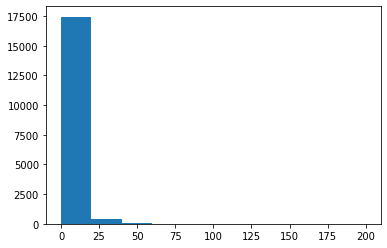

In [17]:
plt.hist(df.fee_cleaned);

/home/alexpins/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexpins/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


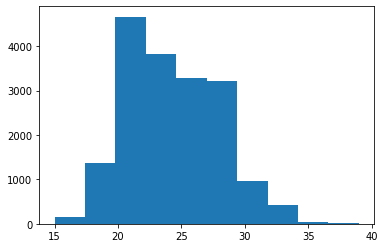

In [18]:
plt.hist(df.age);

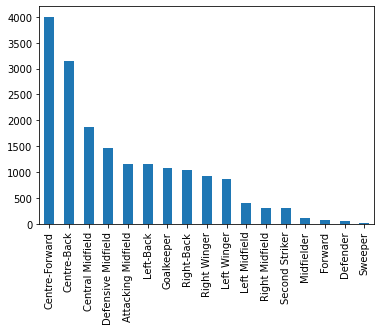

In [19]:
df["position"].value_counts().plot(kind="bar");

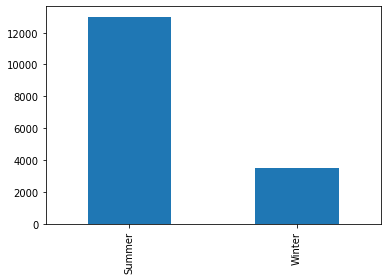

In [20]:
df["transfer_period"].value_counts().plot(kind="bar");

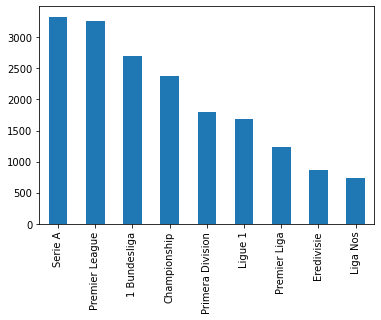

In [21]:
df["league_name"].value_counts().plot(kind="bar");

In [22]:
df.head()

,club_name,age,position,club_involved_name,transfer_period,fee_cleaned,league_name,year
0,FC Girondins Bordeaux,20.0,Attacking Midfield,Cannes,Summer,6.300,Ligue 1,1992
1,RC Strasbourg Alsace,20.0,Attacking Midfield,Man City,Summer,0.450,Ligue 1,1992
2,RC Strasbourg Alsace,17.0,Centre-Forward,Jagiellonia,Summer,0.180,Ligue 1,1992
3,AS Monaco,27.0,Centre-Forward,Inter,Summer,6.300,Ligue 1,1992
4,AJ Auxerre,23.0,Left Midfield,JS Kabylie,Summer,0.034,Ligue 1,1992


In [23]:
df = df.rename(
    columns={
        "club_name": "receiving_club",
        "club_involved_name": "giving_club",
        "league_name": "receiving_league"
    })

In [24]:
name_league_matching = df[["receiving_club", "receiving_league"]].drop_duplicates()
name_league_matching.head()

,receiving_club,receiving_league
0,FC Girondins Bordeaux,Ligue 1
1,RC Strasbourg Alsace,Ligue 1
3,AS Monaco,Ligue 1
4,AJ Auxerre,Ligue 1
5,Paris Saint-Germain,Ligue 1


In [25]:
df.head()

,receiving_club,age,position,giving_club,transfer_period,fee_cleaned,receiving_league,year
0,FC Girondins Bordeaux,20.0,Attacking Midfield,Cannes,Summer,6.300,Ligue 1,1992
1,RC Strasbourg Alsace,20.0,Attacking Midfield,Man City,Summer,0.450,Ligue 1,1992
2,RC Strasbourg Alsace,17.0,Centre-Forward,Jagiellonia,Summer,0.180,Ligue 1,1992
3,AS Monaco,27.0,Centre-Forward,Inter,Summer,6.300,Ligue 1,1992
4,AJ Auxerre,23.0,Left Midfield,JS Kabylie,Summer,0.034,Ligue 1,1992


In [26]:
def get_league(club):
    try:
        league = list(name_league_matching.loc[name_league_matching["receiving_club"]==club].receiving_league)[0]
        return league
    except:
        return "NaN"

In [27]:
df = df[df["age"].notna()]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17965 entries, 0 to 17967
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   receiving_club    17965 non-null  object 
 1   age               17965 non-null  float64
 2   position          17965 non-null  object 
 3   giving_club       17965 non-null  object 
 4   transfer_period   16493 non-null  object 
 5   fee_cleaned       17965 non-null  float64
 6   receiving_league  17965 non-null  object 
 7   year              17965 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [29]:
df.describe()

,age,fee_cleaned,year
count,17965.000000,17965.000000,17965.000000
mean,24.200612,3.737029,2009.152018
std,3.552208,7.067637,7.649198
min,15.000000,0.002000,1992.000000
25%,22.000000,0.450000,2004.000000
50%,24.000000,1.440000,2010.000000
75%,27.000000,4.050000,2016.000000
max,39.000000,199.800000,2021.000000


# Creating X and y

In [30]:
X = df.drop(["fee_cleaned"], axis=1)

In [31]:
y = df.fee_cleaned

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X.head()

,receiving_club,age,position,giving_club,transfer_period,receiving_league,year
0,FC Girondins Bordeaux,20.0,Attacking Midfield,Cannes,Summer,Ligue 1,1992
1,RC Strasbourg Alsace,20.0,Attacking Midfield,Man City,Summer,Ligue 1,1992
2,RC Strasbourg Alsace,17.0,Centre-Forward,Jagiellonia,Summer,Ligue 1,1992
3,AS Monaco,27.0,Centre-Forward,Inter,Summer,Ligue 1,1992
4,AJ Auxerre,23.0,Left Midfield,JS Kabylie,Summer,Ligue 1,1992


In [34]:
y.head()

0    6.300
1    0.450
2    0.180
3    6.300
4    0.034
Name: fee_cleaned, dtype: float64

# Building pipeline

In [73]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [42]:
set_config(display="diagram")

In [37]:
num_transformer = Pipeline([("scaler", MinMaxScaler())])

In [38]:
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [39]:
preprocessor = ColumnTransformer([
    ("num_tr", num_transformer, ["age", "year"]),
    ("cat_tr", cat_transformer, ["receiving_club", "position", "giving_club", "transfer_period", "receiving_league"])
])

In [54]:
pipe = make_pipeline(preprocessor, Ridge())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'year']),
                                                 ('cat_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['receiving_club', 'position',
                                                   'giving_club',
                                                   'transfer_period',
                                                   'receiving_league'])])),
                ('ridge', Ridge())])

# Fit model

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'year']),
                                                 ('cat_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['receiving_club', 'position',
                                                   'giving_club',
                                                   'transfer_period',
                                                   'receiving_league'])])),
                ('linearregression', LinearRegression())])

In [55]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2').mean()

0.311147570131292

In [95]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num_tr',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['age', 'year']),
                                   ('cat_tr',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['receiving_club', 'position', 'giving_club',
                                     'transfer_period', 'receiving_league'])])),
  ('ridge', Ridge())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('num_tr',
                                  Pipeline(steps=[('scaler', MinMaxScaler())]),
                                  ['age', 'year']),
     

In [96]:
X_train.shape

(14372, 7)

In [97]:
X_test.shape

(3593, 7)

In [98]:
X_train

,receiving_club,age,position,giving_club,transfer_period,receiving_league,year
14132,Sevilla FC,21.0,Central Midfield,Gimnàstic,Summer,Primera Division,2016
4682,Southampton FC,23.0,Centre-Forward,Aston Villa,Summer,Premier League,2004
1159,West Bromwich Albion,25.0,Centre-Forward,Birmingham,NaN,Championship,1996
8502,Everton FC,25.0,Centre-Back,Atlético Madrid,Summer,Premier League,2009
7922,CA Osasuna,24.0,Centre-Back,Paços Ferreira,Summer,Primera Division,2008
...,...,...,...,...,...,...,...
17907,West Ham United,26.0,Centre-Back,Chelsea,Summer,Premier League,2021
17184,SSC Napoli,26.0,Defensive Midfield,Chelsea,Summer,Serie A,2020
1998,Queens Park Rangers,24.0,Midfielder,Saffron Walden,NaN,Championship,1998
15944,Valencia CF,25.0,Central Midfield,Inter,Summer,Primera Division,2018


950:	learn: 3.6723463	total: 34s	remaining: 1.75s
951:	learn: 3.6713679	total: 34.1s	remaining: 1.72s
952:	learn: 3.6711648	total: 34.1s	remaining: 1.68s
953:	learn: 3.6704128	total: 34.1s	remaining: 1.64s
954:	learn: 3.6692225	total: 34.1s	remaining: 1.61s
955:	learn: 3.6682833	total: 34.2s	remaining: 1.57s
956:	learn: 3.6676373	total: 34.2s	remaining: 1.54s
957:	learn: 3.6662454	total: 34.3s	remaining: 1.5s
958:	learn: 3.6655246	total: 34.3s	remaining: 1.47s
959:	learn: 3.6645146	total: 34.3s	remaining: 1.43s
960:	learn: 3.6630119	total: 34.4s	remaining: 1.4s
961:	learn: 3.6619583	total: 34.4s	remaining: 1.36s
962:	learn: 3.6611241	total: 34.5s	remaining: 1.32s
963:	learn: 3.6602273	total: 34.5s	remaining: 1.29s
964:	learn: 3.6593537	total: 34.5s	remaining: 1.25s
965:	learn: 3.6587312	total: 34.6s	remaining: 1.22s
966:	learn: 3.6578249	total: 34.7s	remaining: 1.18s
967:	learn: 3.6566462	total: 34.7s	remaining: 1.15s
968:	learn: 3.6552072	total: 34.7s	remaining: 1.11s
969:	learn: 3.65

In [76]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [93]:
param_grid={
    'columntransformer__num_tr__scaler': [RobustScaler()],
    'ridge': [#Ridge(), 
              #LinearRegression(), 
              #XGBRegressor(), 
              CatBoostRegressor(), 
              #SGDRegressor(), 
              #KernelRidge(), 
              #ElasticNet(),
              #BayesianRidge(), 
              #GradientBoostingRegressor(),
              #SVR()
    ]}

In [94]:
grid_search = GridSearchCV(
    pipe, 
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Learning rate set to 0.060222
0:	learn: 6.9607599	total: 83.7ms	remaining: 1m 23s
1:	learn: 6.8868663	total: 124ms	remaining: 1m 2s
2:	learn: 6.8266054	total: 141ms	remaining: 46.9s
3:	learn: 6.7704038	total: 157ms	remaining: 39.1s
4:	learn: 6.7134116	total: 173ms	remaining: 34.5s
5:	learn: 6.6632734	total: 211ms	remaining: 34.9s
6:	learn: 6.6194937	total: 228ms	remaining: 32.3s
7:	learn: 6.5778490	total: 251ms	remaining: 31.1s
8:	learn: 6.5420113	total: 282ms	remaining: 31s
9:	learn: 6.5081686	total: 319ms	remaining: 31.6s
10:	learn: 6.4696230	total: 430ms	remaining: 38.7s
11:	learn: 6.4362385	total: 442ms	remaining: 36.4s
12:	learn: 6.4079659	total: 453ms	remaining: 34.4s
13:	learn: 6.3784724	total: 460ms	remaining: 32.4s
14:	learn: 6.3497734	total: 472ms	remaining: 31s
15:	learn: 6.3260179	total: 485ms	remaining: 29.8s
16:	learn: 6.3004935	total: 520ms	remaining: 30s
17:	learn: 6.2716332	total: 548ms	remaining: 29.9s
18:	learn: 6.2512601	total: 586ms	remaining: 30.2s
19:	learn: 6.22

Learning rate set to 0.060222
0:	learn: 6.8085226	total: 53.6ms	remaining: 53.6s
1:	learn: 6.7486277	total: 63.4ms	remaining: 31.6s
2:	learn: 6.6858474	total: 70.7ms	remaining: 23.5s
3:	learn: 6.6330701	total: 79ms	remaining: 19.7s
4:	learn: 6.5765705	total: 86.4ms	remaining: 17.2s
5:	learn: 6.5241260	total: 92.3ms	remaining: 15.3s
6:	learn: 6.4805583	total: 100ms	remaining: 14.2s
7:	learn: 6.4359626	total: 109ms	remaining: 13.6s
8:	learn: 6.3940519	total: 153ms	remaining: 16.9s
9:	learn: 6.3620776	total: 160ms	remaining: 15.9s
10:	learn: 6.3304498	total: 180ms	remaining: 16.2s
11:	learn: 6.3004600	total: 207ms	remaining: 17.1s
12:	learn: 6.2691250	total: 239ms	remaining: 18.1s
13:	learn: 6.2419757	total: 279ms	remaining: 19.7s
14:	learn: 6.2133980	total: 321ms	remaining: 21.1s
15:	learn: 6.1940819	total: 346ms	remaining: 21.3s
16:	learn: 6.1668384	total: 392ms	remaining: 22.7s
17:	learn: 6.1415786	total: 432ms	remaining: 23.6s
18:	learn: 6.1186975	total: 482ms	remaining: 24.9s
19:	lea

160:	learn: 5.1023242	total: 5.17s	remaining: 26.9s
161:	learn: 5.0973287	total: 5.19s	remaining: 26.9s
162:	learn: 5.0920802	total: 5.21s	remaining: 26.8s
163:	learn: 5.0865237	total: 5.23s	remaining: 26.7s
164:	learn: 5.0828152	total: 5.27s	remaining: 26.7s
165:	learn: 5.0789604	total: 5.31s	remaining: 26.7s
166:	learn: 5.0738402	total: 5.34s	remaining: 26.6s
167:	learn: 5.0704196	total: 5.36s	remaining: 26.5s
168:	learn: 5.0633097	total: 5.38s	remaining: 26.4s
169:	learn: 5.0583300	total: 5.43s	remaining: 26.5s
170:	learn: 5.0544501	total: 5.45s	remaining: 26.4s
171:	learn: 5.0501313	total: 5.5s	remaining: 26.5s
172:	learn: 5.0466101	total: 5.52s	remaining: 26.4s
173:	learn: 5.0421219	total: 5.54s	remaining: 26.3s
174:	learn: 5.0365518	total: 5.56s	remaining: 26.2s
175:	learn: 5.0329810	total: 5.59s	remaining: 26.2s
176:	learn: 5.0272946	total: 5.63s	remaining: 26.2s
177:	learn: 5.0239050	total: 5.66s	remaining: 26.1s
178:	learn: 5.0199038	total: 5.7s	remaining: 26.2s
179:	learn: 5.

159:	learn: 4.9758498	total: 5.66s	remaining: 29.7s
160:	learn: 4.9709409	total: 5.73s	remaining: 29.9s
161:	learn: 4.9656811	total: 5.77s	remaining: 29.8s
162:	learn: 4.9624011	total: 5.8s	remaining: 29.8s
163:	learn: 4.9578244	total: 5.85s	remaining: 29.8s
164:	learn: 4.9530772	total: 5.87s	remaining: 29.7s
165:	learn: 4.9491354	total: 5.89s	remaining: 29.6s
166:	learn: 4.9442046	total: 5.92s	remaining: 29.5s
167:	learn: 4.9413963	total: 5.95s	remaining: 29.5s
168:	learn: 4.9379162	total: 5.98s	remaining: 29.4s
169:	learn: 4.9355226	total: 6.01s	remaining: 29.3s
170:	learn: 4.9312721	total: 6.04s	remaining: 29.3s
171:	learn: 4.9277560	total: 6.07s	remaining: 29.2s
172:	learn: 4.9234746	total: 6.08s	remaining: 29.1s
173:	learn: 4.9190310	total: 6.11s	remaining: 29s
174:	learn: 4.9159550	total: 6.13s	remaining: 28.9s
175:	learn: 4.9119982	total: 6.17s	remaining: 28.9s
176:	learn: 4.9080146	total: 6.19s	remaining: 28.8s
177:	learn: 4.9034478	total: 6.24s	remaining: 28.8s
178:	learn: 4.8

159:	learn: 5.0075083	total: 5.6s	remaining: 29.4s
160:	learn: 5.0049153	total: 5.63s	remaining: 29.3s
161:	learn: 5.0011055	total: 5.7s	remaining: 29.5s
162:	learn: 4.9964568	total: 5.71s	remaining: 29.3s
163:	learn: 4.9923319	total: 5.74s	remaining: 29.2s
164:	learn: 4.9874959	total: 5.76s	remaining: 29.1s
165:	learn: 4.9827931	total: 5.78s	remaining: 29s
166:	learn: 4.9784784	total: 5.84s	remaining: 29.1s
167:	learn: 4.9760519	total: 5.87s	remaining: 29.1s
168:	learn: 4.9713937	total: 5.91s	remaining: 29.1s
169:	learn: 4.9673563	total: 5.92s	remaining: 28.9s
170:	learn: 4.9638879	total: 5.95s	remaining: 28.9s
171:	learn: 4.9599474	total: 6s	remaining: 28.9s
172:	learn: 4.9561918	total: 6.03s	remaining: 28.8s
173:	learn: 4.9508009	total: 6.05s	remaining: 28.7s
174:	learn: 4.9449348	total: 6.1s	remaining: 28.8s
175:	learn: 4.9397531	total: 6.12s	remaining: 28.6s
176:	learn: 4.9357020	total: 6.15s	remaining: 28.6s
177:	learn: 4.9329403	total: 6.19s	remaining: 28.6s
178:	learn: 4.930617

317:	learn: 4.5867864	total: 10.3s	remaining: 22.1s
318:	learn: 4.5838326	total: 10.3s	remaining: 22.1s
319:	learn: 4.5813658	total: 10.4s	remaining: 22.1s
320:	learn: 4.5787640	total: 10.4s	remaining: 22s
321:	learn: 4.5746060	total: 10.4s	remaining: 22s
322:	learn: 4.5714594	total: 10.5s	remaining: 22s
323:	learn: 4.5675222	total: 10.5s	remaining: 22s
324:	learn: 4.5654416	total: 10.6s	remaining: 21.9s
325:	learn: 4.5650705	total: 10.6s	remaining: 21.9s
326:	learn: 4.5629806	total: 10.6s	remaining: 21.8s
327:	learn: 4.5609472	total: 10.7s	remaining: 21.9s
328:	learn: 4.5603710	total: 10.7s	remaining: 21.8s
329:	learn: 4.5575702	total: 10.7s	remaining: 21.8s
330:	learn: 4.5555712	total: 10.8s	remaining: 21.8s
331:	learn: 4.5551068	total: 10.8s	remaining: 21.7s
332:	learn: 4.5520867	total: 10.8s	remaining: 21.7s
333:	learn: 4.5500917	total: 10.9s	remaining: 21.6s
334:	learn: 4.5481851	total: 10.9s	remaining: 21.7s
335:	learn: 4.5455913	total: 10.9s	remaining: 21.6s
336:	learn: 4.542784

317:	learn: 4.5204951	total: 11.5s	remaining: 24.7s
318:	learn: 4.5177940	total: 11.5s	remaining: 24.7s
319:	learn: 4.5147869	total: 11.6s	remaining: 24.6s
320:	learn: 4.5116752	total: 11.6s	remaining: 24.5s
321:	learn: 4.5098960	total: 11.7s	remaining: 24.6s
322:	learn: 4.5074124	total: 11.7s	remaining: 24.5s
323:	learn: 4.5057065	total: 11.8s	remaining: 24.6s
324:	learn: 4.5054324	total: 11.8s	remaining: 24.6s
325:	learn: 4.5039331	total: 11.8s	remaining: 24.5s
326:	learn: 4.5017668	total: 11.9s	remaining: 24.5s
327:	learn: 4.4998528	total: 11.9s	remaining: 24.5s
328:	learn: 4.4976878	total: 12s	remaining: 24.4s
329:	learn: 4.4953708	total: 12s	remaining: 24.4s
330:	learn: 4.4933918	total: 12s	remaining: 24.3s
331:	learn: 4.4919491	total: 12.1s	remaining: 24.3s
332:	learn: 4.4883435	total: 12.2s	remaining: 24.4s
333:	learn: 4.4853584	total: 12.2s	remaining: 24.3s
334:	learn: 4.4816390	total: 12.2s	remaining: 24.2s
335:	learn: 4.4800458	total: 12.2s	remaining: 24.2s
336:	learn: 4.4789

476:	learn: 4.2304855	total: 15.6s	remaining: 17.2s
477:	learn: 4.2290509	total: 15.7s	remaining: 17.1s
478:	learn: 4.2288582	total: 15.7s	remaining: 17.1s
479:	learn: 4.2277143	total: 15.7s	remaining: 17.1s
480:	learn: 4.2248008	total: 15.8s	remaining: 17s
481:	learn: 4.2220047	total: 15.8s	remaining: 17s
482:	learn: 4.2199911	total: 15.8s	remaining: 17s
483:	learn: 4.2177181	total: 15.9s	remaining: 16.9s
484:	learn: 4.2174805	total: 15.9s	remaining: 16.9s
485:	learn: 4.2157524	total: 15.9s	remaining: 16.9s
486:	learn: 4.2136443	total: 16s	remaining: 16.8s
487:	learn: 4.2115174	total: 16s	remaining: 16.8s
488:	learn: 4.2095438	total: 16.1s	remaining: 16.8s
489:	learn: 4.2076459	total: 16.1s	remaining: 16.7s
490:	learn: 4.2074493	total: 16.1s	remaining: 16.7s
491:	learn: 4.2061938	total: 16.1s	remaining: 16.6s
492:	learn: 4.2043316	total: 16.1s	remaining: 16.6s
493:	learn: 4.2035137	total: 16.2s	remaining: 16.6s
494:	learn: 4.2017433	total: 16.2s	remaining: 16.5s
495:	learn: 4.2001523	

475:	learn: 4.1849887	total: 16.9s	remaining: 18.6s
476:	learn: 4.1836045	total: 17s	remaining: 18.6s
477:	learn: 4.1820387	total: 17.1s	remaining: 18.6s
478:	learn: 4.1804737	total: 17.1s	remaining: 18.6s
479:	learn: 4.1791137	total: 17.1s	remaining: 18.6s
480:	learn: 4.1772761	total: 17.2s	remaining: 18.6s
481:	learn: 4.1758616	total: 17.3s	remaining: 18.5s
482:	learn: 4.1737997	total: 17.3s	remaining: 18.5s
483:	learn: 4.1721933	total: 17.3s	remaining: 18.5s
484:	learn: 4.1709503	total: 17.4s	remaining: 18.4s
485:	learn: 4.1691198	total: 17.4s	remaining: 18.4s
486:	learn: 4.1689071	total: 17.4s	remaining: 18.4s
487:	learn: 4.1674975	total: 17.5s	remaining: 18.4s
488:	learn: 4.1662966	total: 17.5s	remaining: 18.3s
489:	learn: 4.1653045	total: 17.6s	remaining: 18.3s
490:	learn: 4.1639462	total: 17.6s	remaining: 18.3s
491:	learn: 4.1623342	total: 17.6s	remaining: 18.2s
492:	learn: 4.1606955	total: 17.7s	remaining: 18.2s
493:	learn: 4.1604639	total: 17.7s	remaining: 18.1s
494:	learn: 4.

634:	learn: 4.0021088	total: 21.5s	remaining: 12.4s
635:	learn: 4.0013136	total: 21.6s	remaining: 12.4s
636:	learn: 4.0000174	total: 21.6s	remaining: 12.3s
637:	learn: 3.9993927	total: 21.7s	remaining: 12.3s
638:	learn: 3.9981483	total: 21.8s	remaining: 12.3s
639:	learn: 3.9973562	total: 21.8s	remaining: 12.3s
640:	learn: 3.9949155	total: 21.8s	remaining: 12.2s
641:	learn: 3.9934876	total: 21.9s	remaining: 12.2s
642:	learn: 3.9928638	total: 22s	remaining: 12.2s
643:	learn: 3.9919092	total: 22s	remaining: 12.2s
644:	learn: 3.9900975	total: 22.1s	remaining: 12.1s
645:	learn: 3.9888178	total: 22.1s	remaining: 12.1s
646:	learn: 3.9862160	total: 22.2s	remaining: 12.1s
647:	learn: 3.9847799	total: 22.2s	remaining: 12.1s
648:	learn: 3.9844725	total: 22.2s	remaining: 12s
649:	learn: 3.9834225	total: 22.3s	remaining: 12s
650:	learn: 3.9817067	total: 22.3s	remaining: 12s
651:	learn: 3.9805915	total: 22.3s	remaining: 11.9s
652:	learn: 3.9785253	total: 22.4s	remaining: 11.9s
653:	learn: 3.9765562	

633:	learn: 3.9731761	total: 22.9s	remaining: 13.2s
634:	learn: 3.9721492	total: 23s	remaining: 13.2s
635:	learn: 3.9710337	total: 23.1s	remaining: 13.2s
636:	learn: 3.9695552	total: 23.1s	remaining: 13.2s
637:	learn: 3.9680249	total: 23.1s	remaining: 13.1s
638:	learn: 3.9663969	total: 23.2s	remaining: 13.1s
639:	learn: 3.9652053	total: 23.2s	remaining: 13.1s
640:	learn: 3.9644559	total: 23.3s	remaining: 13s
641:	learn: 3.9637437	total: 23.3s	remaining: 13s
642:	learn: 3.9631202	total: 23.4s	remaining: 13s
643:	learn: 3.9619780	total: 23.4s	remaining: 12.9s
644:	learn: 3.9609789	total: 23.4s	remaining: 12.9s
645:	learn: 3.9598715	total: 23.5s	remaining: 12.9s
646:	learn: 3.9583362	total: 23.5s	remaining: 12.8s
647:	learn: 3.9566348	total: 23.6s	remaining: 12.8s
648:	learn: 3.9555836	total: 23.6s	remaining: 12.8s
649:	learn: 3.9550427	total: 23.6s	remaining: 12.7s
650:	learn: 3.9547814	total: 23.7s	remaining: 12.7s
651:	learn: 3.9544038	total: 23.8s	remaining: 12.7s
652:	learn: 3.952739

792:	learn: 3.8178219	total: 28s	remaining: 7.3s
793:	learn: 3.8171737	total: 28s	remaining: 7.27s
794:	learn: 3.8157340	total: 28.1s	remaining: 7.23s
795:	learn: 3.8147465	total: 28.1s	remaining: 7.21s
796:	learn: 3.8137000	total: 28.1s	remaining: 7.17s
797:	learn: 3.8115882	total: 28.2s	remaining: 7.13s
798:	learn: 3.8096894	total: 28.2s	remaining: 7.1s
799:	learn: 3.8081380	total: 28.3s	remaining: 7.06s
800:	learn: 3.8066059	total: 28.3s	remaining: 7.03s
801:	learn: 3.8051508	total: 28.3s	remaining: 6.99s
802:	learn: 3.8044442	total: 28.3s	remaining: 6.95s
803:	learn: 3.8029691	total: 28.4s	remaining: 6.91s
804:	learn: 3.8020769	total: 28.4s	remaining: 6.88s
805:	learn: 3.8002703	total: 28.4s	remaining: 6.85s
806:	learn: 3.7994584	total: 28.5s	remaining: 6.81s
807:	learn: 3.7988203	total: 28.5s	remaining: 6.78s
808:	learn: 3.7972663	total: 28.6s	remaining: 6.75s
809:	learn: 3.7961170	total: 28.6s	remaining: 6.71s
810:	learn: 3.7950447	total: 28.7s	remaining: 6.68s
811:	learn: 3.7939

792:	learn: 3.8934425	total: 28.5s	remaining: 7.44s
793:	learn: 3.8923718	total: 28.5s	remaining: 7.4s
794:	learn: 3.8906087	total: 28.6s	remaining: 7.37s
795:	learn: 3.8893796	total: 28.6s	remaining: 7.33s
796:	learn: 3.8871685	total: 28.6s	remaining: 7.29s
797:	learn: 3.8858911	total: 28.7s	remaining: 7.26s
798:	learn: 3.8857484	total: 28.7s	remaining: 7.23s
799:	learn: 3.8850016	total: 28.8s	remaining: 7.2s
800:	learn: 3.8834830	total: 28.8s	remaining: 7.17s
801:	learn: 3.8827827	total: 28.9s	remaining: 7.14s
802:	learn: 3.8811697	total: 28.9s	remaining: 7.1s
803:	learn: 3.8802057	total: 29s	remaining: 7.07s
804:	learn: 3.8791489	total: 29s	remaining: 7.03s
805:	learn: 3.8779458	total: 29.1s	remaining: 7s
806:	learn: 3.8772548	total: 29.1s	remaining: 6.96s
807:	learn: 3.8756293	total: 29.2s	remaining: 6.93s
808:	learn: 3.8749338	total: 29.2s	remaining: 6.89s
809:	learn: 3.8738170	total: 29.2s	remaining: 6.86s
810:	learn: 3.8725770	total: 29.3s	remaining: 6.82s
811:	learn: 3.8720906	

792:	learn: 3.8155663	total: 29.7s	remaining: 7.76s
793:	learn: 3.8147257	total: 29.8s	remaining: 7.72s
794:	learn: 3.8140040	total: 29.8s	remaining: 7.68s
795:	learn: 3.8132919	total: 29.8s	remaining: 7.64s
796:	learn: 3.8118316	total: 29.8s	remaining: 7.59s
797:	learn: 3.8107002	total: 29.8s	remaining: 7.55s
798:	learn: 3.8100834	total: 29.9s	remaining: 7.51s
799:	learn: 3.8084647	total: 29.9s	remaining: 7.47s
800:	learn: 3.8076517	total: 29.9s	remaining: 7.43s
801:	learn: 3.8069515	total: 30s	remaining: 7.4s
802:	learn: 3.8054007	total: 30s	remaining: 7.36s
803:	learn: 3.8038871	total: 30s	remaining: 7.32s
804:	learn: 3.8033225	total: 30.1s	remaining: 7.29s
805:	learn: 3.8014777	total: 30.1s	remaining: 7.25s
806:	learn: 3.8007214	total: 30.2s	remaining: 7.21s
807:	learn: 3.7996588	total: 30.2s	remaining: 7.17s
808:	learn: 3.7983360	total: 30.2s	remaining: 7.14s
809:	learn: 3.7973075	total: 30.3s	remaining: 7.1s
810:	learn: 3.7960867	total: 30.3s	remaining: 7.07s
811:	learn: 3.795970

24:	learn: 6.0713221	total: 175ms	remaining: 6.84s
25:	learn: 6.0533699	total: 182ms	remaining: 6.83s
26:	learn: 6.0372935	total: 192ms	remaining: 6.91s
27:	learn: 6.0213121	total: 199ms	remaining: 6.9s
28:	learn: 6.0024939	total: 206ms	remaining: 6.88s
29:	learn: 5.9886960	total: 212ms	remaining: 6.87s
30:	learn: 5.9749920	total: 219ms	remaining: 6.86s
31:	learn: 5.9580072	total: 226ms	remaining: 6.83s
32:	learn: 5.9396318	total: 232ms	remaining: 6.81s
33:	learn: 5.9236580	total: 239ms	remaining: 6.79s
34:	learn: 5.9087783	total: 246ms	remaining: 6.78s
35:	learn: 5.8967268	total: 253ms	remaining: 6.76s
36:	learn: 5.8846531	total: 259ms	remaining: 6.75s
37:	learn: 5.8717076	total: 266ms	remaining: 6.74s
38:	learn: 5.8614287	total: 273ms	remaining: 6.74s
39:	learn: 5.8505321	total: 280ms	remaining: 6.73s
40:	learn: 5.8358623	total: 287ms	remaining: 6.71s
41:	learn: 5.8278943	total: 294ms	remaining: 6.71s
42:	learn: 5.8145692	total: 301ms	remaining: 6.69s
43:	learn: 5.8015392	total: 308m

194:	learn: 4.9504557	total: 1.37s	remaining: 5.65s
195:	learn: 4.9463136	total: 1.38s	remaining: 5.65s
196:	learn: 4.9433293	total: 1.39s	remaining: 5.65s
197:	learn: 4.9398683	total: 1.39s	remaining: 5.65s
198:	learn: 4.9363149	total: 1.4s	remaining: 5.64s
199:	learn: 4.9335559	total: 1.41s	remaining: 5.63s
200:	learn: 4.9292728	total: 1.42s	remaining: 5.63s
201:	learn: 4.9247622	total: 1.42s	remaining: 5.62s
202:	learn: 4.9218591	total: 1.43s	remaining: 5.62s
203:	learn: 4.9193594	total: 1.44s	remaining: 5.61s
204:	learn: 4.9167892	total: 1.45s	remaining: 5.6s
205:	learn: 4.9122761	total: 1.45s	remaining: 5.6s
206:	learn: 4.9100277	total: 1.46s	remaining: 5.59s
207:	learn: 4.9058622	total: 1.47s	remaining: 5.58s
208:	learn: 4.9020754	total: 1.47s	remaining: 5.58s
209:	learn: 4.8962256	total: 1.48s	remaining: 5.57s
210:	learn: 4.8930132	total: 1.49s	remaining: 5.57s
211:	learn: 4.8902265	total: 1.5s	remaining: 5.56s
212:	learn: 4.8881650	total: 1.5s	remaining: 5.55s
213:	learn: 4.885

366:	learn: 4.4910308	total: 2.55s	remaining: 4.4s
367:	learn: 4.4887655	total: 2.56s	remaining: 4.4s
368:	learn: 4.4858076	total: 2.57s	remaining: 4.39s
369:	learn: 4.4854924	total: 2.58s	remaining: 4.39s
370:	learn: 4.4833420	total: 2.58s	remaining: 4.38s
371:	learn: 4.4822584	total: 2.59s	remaining: 4.38s
372:	learn: 4.4797782	total: 2.6s	remaining: 4.37s
373:	learn: 4.4768108	total: 2.61s	remaining: 4.37s
374:	learn: 4.4751745	total: 2.62s	remaining: 4.36s
375:	learn: 4.4721428	total: 2.63s	remaining: 4.36s
376:	learn: 4.4697659	total: 2.63s	remaining: 4.35s
377:	learn: 4.4672968	total: 2.64s	remaining: 4.34s
378:	learn: 4.4652282	total: 2.65s	remaining: 4.34s
379:	learn: 4.4629814	total: 2.65s	remaining: 4.33s
380:	learn: 4.4613544	total: 2.66s	remaining: 4.33s
381:	learn: 4.4590306	total: 2.67s	remaining: 4.32s
382:	learn: 4.4560158	total: 2.68s	remaining: 4.31s
383:	learn: 4.4545388	total: 2.69s	remaining: 4.31s
384:	learn: 4.4522029	total: 2.69s	remaining: 4.3s
385:	learn: 4.45

539:	learn: 4.2103401	total: 3.73s	remaining: 3.18s
540:	learn: 4.2078526	total: 3.74s	remaining: 3.17s
541:	learn: 4.2067063	total: 3.75s	remaining: 3.17s
542:	learn: 4.2052882	total: 3.76s	remaining: 3.16s
543:	learn: 4.2037110	total: 3.77s	remaining: 3.16s
544:	learn: 4.2021770	total: 3.77s	remaining: 3.15s
545:	learn: 4.2005262	total: 3.78s	remaining: 3.14s
546:	learn: 4.1983819	total: 3.79s	remaining: 3.14s
547:	learn: 4.1975886	total: 3.79s	remaining: 3.13s
548:	learn: 4.1952788	total: 3.8s	remaining: 3.12s
549:	learn: 4.1943272	total: 3.81s	remaining: 3.12s
550:	learn: 4.1925106	total: 3.81s	remaining: 3.11s
551:	learn: 4.1914850	total: 3.82s	remaining: 3.1s
552:	learn: 4.1902661	total: 3.83s	remaining: 3.1s
553:	learn: 4.1896356	total: 3.83s	remaining: 3.09s
554:	learn: 4.1872415	total: 3.84s	remaining: 3.08s
555:	learn: 4.1870387	total: 3.85s	remaining: 3.07s
556:	learn: 4.1859353	total: 3.86s	remaining: 3.07s
557:	learn: 4.1845947	total: 3.86s	remaining: 3.06s
558:	learn: 4.1

698:	learn: 4.0100828	total: 4.92s	remaining: 2.12s
699:	learn: 4.0078920	total: 4.94s	remaining: 2.12s
700:	learn: 4.0075463	total: 4.95s	remaining: 2.11s
701:	learn: 4.0065175	total: 4.97s	remaining: 2.11s
702:	learn: 4.0051161	total: 4.98s	remaining: 2.1s
703:	learn: 4.0039714	total: 5s	remaining: 2.1s
704:	learn: 4.0031258	total: 5.01s	remaining: 2.1s
705:	learn: 4.0029735	total: 5.02s	remaining: 2.09s
706:	learn: 4.0025439	total: 5.04s	remaining: 2.09s
707:	learn: 4.0015615	total: 5.05s	remaining: 2.08s
708:	learn: 4.0010982	total: 5.06s	remaining: 2.08s
709:	learn: 4.0009089	total: 5.08s	remaining: 2.07s
710:	learn: 3.9999855	total: 5.09s	remaining: 2.07s
711:	learn: 3.9991394	total: 5.1s	remaining: 2.06s
712:	learn: 3.9979443	total: 5.11s	remaining: 2.06s
713:	learn: 3.9972776	total: 5.13s	remaining: 2.05s
714:	learn: 3.9963248	total: 5.14s	remaining: 2.05s
715:	learn: 3.9947442	total: 5.16s	remaining: 2.04s
716:	learn: 3.9934425	total: 5.17s	remaining: 2.04s
717:	learn: 3.99218

884:	learn: 3.8455417	total: 6.72s	remaining: 874ms
885:	learn: 3.8445172	total: 6.73s	remaining: 866ms
886:	learn: 3.8440556	total: 6.74s	remaining: 858ms
887:	learn: 3.8434435	total: 6.74s	remaining: 850ms
888:	learn: 3.8423866	total: 6.75s	remaining: 842ms
889:	learn: 3.8419525	total: 6.75s	remaining: 835ms
890:	learn: 3.8416125	total: 6.76s	remaining: 827ms
891:	learn: 3.8410122	total: 6.77s	remaining: 819ms
892:	learn: 3.8400135	total: 6.77s	remaining: 812ms
893:	learn: 3.8390842	total: 6.78s	remaining: 804ms
894:	learn: 3.8384118	total: 6.78s	remaining: 796ms
895:	learn: 3.8379811	total: 6.79s	remaining: 788ms
896:	learn: 3.8366353	total: 6.8s	remaining: 780ms
897:	learn: 3.8349940	total: 6.8s	remaining: 773ms
898:	learn: 3.8340002	total: 6.81s	remaining: 765ms
899:	learn: 3.8334092	total: 6.81s	remaining: 757ms
900:	learn: 3.8328093	total: 6.82s	remaining: 749ms
901:	learn: 3.8318984	total: 6.83s	remaining: 742ms
902:	learn: 3.8310622	total: 6.83s	remaining: 734ms
903:	learn: 3.